In [44]:
from cmdstanpy import CmdStanModel

import arviz as az
import numpy as np
import scipy.stats as stats

import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

In [45]:
data = pd.read_csv('logistic_reg_data.csv')
data.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,y
count,500.000000,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,249.500000,-0.015777,0.334002,-0.001484,2.022817e-01,2.770684e-03,0.494000
std,144.481833,0.578292,0.301507,0.383111,2.738984e-01,3.107472e-01,0.500465
min,0.000000,-0.997592,0.000005,-0.992794,2.276756e-11,-9.880191e-01,0.000000
25%,124.750000,-0.515144,0.064052,-0.136718,4.102616e-03,-3.628888e-02,0.000000
50%,249.500000,-0.026042,0.254724,-0.000018,6.488454e-02,-1.278838e-08,0.000000
75%,374.250000,0.475396,0.555544,0.107440,3.086316e-01,2.428165e-02,1.000000
max,499.000000,0.999652,0.999305,0.998957,9.986100e-01,9.982628e-01,1.000000


In [46]:
model_ppc1 = CmdStanModel(stan_file='logistic_regression_ppc.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [47]:
R=1000
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=10)
sim_ppc1=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


Task 1.

1. Plot histograms of beta for prior model
2. Plot again the same histograms but this time with other sigma values. For instace use values: 5, 2, 0.75.
3. Consider which result should be taken into account when selecting prior.

In [48]:
df = sim_ppc1.draws_pd()
df

,lp__,accept_stat__,prob_ppc[1],prob_ppc[2],prob_ppc[3],prob_ppc[4],prob_ppc[5],prob_ppc[6],prob_ppc[7],prob_ppc[8],...,prob_ppc[497],prob_ppc[498],prob_ppc[499],prob_ppc[500],beta[1],beta[2],beta[3],beta[4],beta[5],alpha
0,0.0,0.0,0.183287,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.0,1.0,1.0,1.0,27.081700,7.771810,-12.72270,1.27591,-13.89420,2.461620
1,0.0,0.0,0.001395,1.000000,9.999850e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.0,1.0,1.0,1.0,11.987300,22.653300,9.70844,5.55378,5.98941,-0.220250
2,0.0,0.0,0.003400,0.999978,9.937780e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.0,1.0,1.0,1.0,13.120500,-3.421260,-3.11130,16.60650,-1.88132,-5.897550
3,0.0,0.0,0.105054,0.999762,9.988950e-01,9.988680e-01,9.998770e-01,9.999960e-01,1.000000e+00,1.000000e+00,...,1.0,1.0,1.0,1.0,2.843390,-0.719950,1.15899,6.39209,8.91681,-2.374610
4,0.0,0.0,0.988406,0.000006,1.000000e+00,1.000000e+00,9.293960e-01,3.276330e-02,9.999810e-01,9.999990e-01,...,1.0,1.0,1.0,1.0,0.966513,-17.072100,0.98292,-6.49448,11.80830,-1.429630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.261543,0.999059,9.999940e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.0,1.0,1.0,1.0,7.998350,0.786523,-9.13510,1.56640,7.67012,0.112832
996,0.0,0.0,0.900896,0.254183,9.972670e-01,1.115060e-01,6.653730e-05,2.696730e-06,5.196770e-06,1.235530e-06,...,0.0,0.0,0.0,0.0,-2.438420,-4.535120,6.52074,0.27651,0.91221,0.098090
997,0.0,0.0,0.789632,0.000560,3.397850e-09,7.047700e-10,8.571500e-12,2.941140e-15,6.341000e-18,3.968210e-21,...,0.0,0.0,0.0,0.0,-6.799870,-1.190060,-6.19289,4.38884,0.72679,1.707480
998,0.0,0.0,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.0,1.0,1.0,1.0,5.223800,-7.571770,19.73160,-3.85811,-4.31394,10.289300


In [59]:
beta=sim_ppc1.stan_variable('beta')
beta

array([[ 27.0817 ,   7.77181, -12.7227 ,   1.27591, -13.8942 ],
       [ 11.9873 ,  22.6533 ,   9.70844,   5.55378,   5.98941],
       [ 13.1205 ,  -3.42126,  -3.1113 ,  16.6065 ,  -1.88132],
       ...,
       [ -6.79987,  -1.19006,  -6.19289,   4.38884,   0.72679],
       [  5.2238 ,  -7.57177,  19.7316 ,  -3.85811,  -4.31394],
       [  7.70539,   2.08335,  15.1998 ,   4.82109,  -6.60703]])

Text(0.5, 1.0, 'sigma=10')

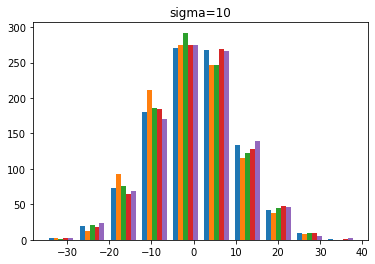

In [50]:
plt.hist(beta)
plt.title('sigma=10')

In [51]:
R=1000
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=5)
sim_ppc2=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [60]:
df = sim_ppc1.draws_pd()
beta=sim_ppc1.stan_variable('beta')
beta

array([[ 27.0817 ,   7.77181, -12.7227 ,   1.27591, -13.8942 ],
       [ 11.9873 ,  22.6533 ,   9.70844,   5.55378,   5.98941],
       [ 13.1205 ,  -3.42126,  -3.1113 ,  16.6065 ,  -1.88132],
       ...,
       [ -6.79987,  -1.19006,  -6.19289,   4.38884,   0.72679],
       [  5.2238 ,  -7.57177,  19.7316 ,  -3.85811,  -4.31394],
       [  7.70539,   2.08335,  15.1998 ,   4.82109,  -6.60703]])

Text(0.5, 1.0, 'sigma=5')

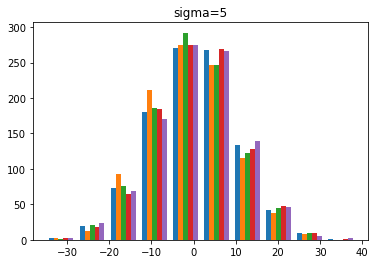

In [62]:
plt.hist(beta)
plt.title('sigma=5')

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


Text(0.5, 1.0, 'sigma=2')

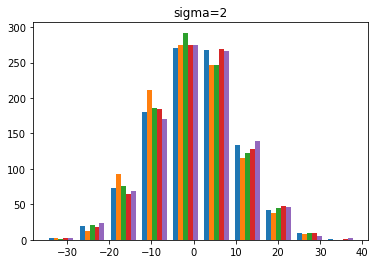

In [56]:
R=1000
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=2)
sim_ppc2=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

df = sim_ppc1.draws_pd()
beta=sim_ppc1.stan_variable('beta')

plt.hist(beta)
plt.title('sigma=2')

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


Text(0.5, 1.0, 'sigma=0.75')

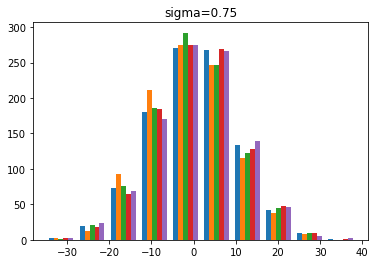

In [63]:
R=1000
data_ppc= dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 sigma=0.75)
sim_ppc2=model_ppc1.sample(data=data_ppc, 
                           iter_sampling=R, iter_warmup=0, 
                           chains=1, 
                           refresh=R,
                           fixed_param=True,
                           seed=29042020)

df = sim_ppc1.draws_pd()
beta=sim_ppc1.stan_variable('beta')

plt.hist(beta)
plt.title('sigma=0.75')

Posterior inference

In [65]:
model = CmdStanModel(stan_file='logistic_regression.stan')

INFO:cmdstanpy:compiling stan file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression.stan to exe file /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression
INFO:cmdstanpy:compiled model executable: /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression.hpp /Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression.stan
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regression.stan', line 6, column 4: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/piotrszyller/Documents/2ndLv/s01/DataAnalytics/L05/logistic_regressi

In [66]:
data_dict = dict(N = data.shape[0],
                 M = 5,
                 X = data.iloc[:,0:5].values,
                 y = data.y.values
                 )
fit = model.sample(data=data_dict, seed=4938483)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▍         | 00:00 Status



chain 1 |▉         | 00:04 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:06 Iteration:  100 / 2000 [  5%]  (Warmup)



chain 1 |█▊        | 00:06 Iteration:  200 / 2000 [ 10%]  (Warmup)


chain 1 |██▎       | 00:07 Iteration:  300 / 2000 [ 15%]  (Warmup)



chain 1 |██▋       | 00:08 Iteration:  400 / 2000 [ 20%]  (Warmup)


chain 1 |███▏      | 00:08 Iteration:  500 / 2000 [ 25%]  (Warmup)


chain 1 |███▋      | 00:09 Iteration:  600 / 2000 [ 30%]  (Warmup)


chain 1 |████      | 00:09 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |████▌     | 00:10 Iteration:  800 / 2000 [ 40%]  (Warmup)




chain 1 |█████     | 00:11 Iteration:  900 / 2000 [ 45%]  (Warmup)
chain 1 |█████▉    | 00:11 Iteration: 1001 / 2000 [ 50%]  (Sampling)


chain 1 |██████▎   | 00:12 Iteration: 1100 / 2000 [ 55%]  (Sampling)


chain 1 |██████▊   | 00:12 Iteration: 1200 / 2000 [ 


INFO:cmdstanpy:CmdStan done processing.


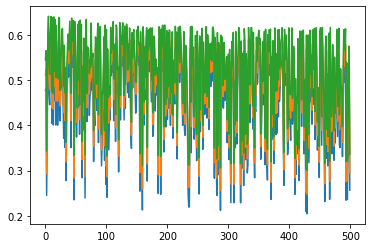

In [68]:
#plot
med_prob_ppc = np.percentile(fit.stan_variable('prob_ppc'),[25,50,75],axis=0)
estimate_ppc_df = pd.DataFrame(med_prob_ppc.T,columns = ['lo','med','hi'])
plt.plot(estimate_ppc_df)